# Zomato Restaurant Ratings


#### Importing libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pickle
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Dataset

In [160]:
data = pd.read_csv('../data/zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [161]:
data.menu_item.value_counts()

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [162]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [163]:
data.shape

(51717, 17)

# Preparing Data(Cleaning Data)

##### Dropping the column like "phone" and "url" and saving the new dataset as "df"

In [164]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [165]:
df=data.drop(['url','phone','address'],axis=1) #Dropping the column like "phone" and "url" and saving the new dataset as "df"


### Handling missing values

In [166]:
df.dtypes #checking the data types


name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [167]:
df.isna().sum() #Checking null values


name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Checking for duplicate values

In [168]:
df.duplicated().sum()

63

In [169]:
df.drop_duplicates(inplace=True)

### Handling missing values

In [170]:
df.dtypes #checking the data types


name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [171]:
df.isna().sum() #Checking null values


name                               0
online_order                       0
book_table                         0
rate                            7760
votes                              0
location                          21
rest_type                        227
dish_liked                     28027
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### dish_liked columns has lots of null values . Let's analyze and replace with something                

In [172]:
df[df['dish_liked'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari
22,Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
24,Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,NaN,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",[],Cafes,Banashankari
25,CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield


In [173]:
import numpy as np
df['dish_liked'] = df['dish_liked'].replace(np.nan, 'not_available', regex=True)

In [174]:
df[df['dish_liked']=='not_available']

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,not_available,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,not_available,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari
22,Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,not_available,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
24,Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,not_available,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",[],Cafes,Banashankari
25,CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,not_available,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,not_available,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,not_available,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,not_available,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,not_available,Finger Food,"2,000",[],[],Pubs and bars,Whitefield


In [175]:
df.isna().sum() #Checking null values


name                              0
online_order                      0
book_table                        0
rate                           7760
votes                             0
location                         21
rest_type                       227
dish_liked                        0
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [176]:
df[df['rate'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,not_available,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,not_available,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",not_available,South Indian,400,[],[],Delivery,Banashankari
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,not_available,South Indian,200,[],[],Delivery,Banashankari
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",not_available,Beverages,250,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,not_available,North Indian,400,[],[],Dine-out,Whitefield
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,not_available,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,not_available,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,not_available,Finger Food,600,[],[],Pubs and bars,Whitefield


### Drop null values

In [177]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [178]:
df.shape

(43486, 14)

In [179]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

##### cost column

In [180]:
df['cost'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [181]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [182]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130., 1700., 1400., 1350., 2200., 2000., 1800., 1900.,
        180.,  330., 2500., 2100., 3000., 2800., 3400.,   50.,   40.,
       1250., 3500., 4000., 2400., 2600., 1450.,   70., 3200.,  560.,
        240.,  360., 6000., 1050., 2300., 4100.,  120., 5000., 3700.,
       1650., 2700., 4500.])

In [183]:
df.dtypes


name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

#### Rate column

In [184]:

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [185]:
df.shape[0]

43486

In [186]:
df[df['rate'] == 'NEW']['rate'].count()

2195

In [187]:
df[df['rate'] == '-']['rate'].count()

65

In [188]:
df = df.loc[df.rate !='NEW'] #getting rid of "NEW" 


In [189]:
df.shape

(41291, 14)

In [190]:
df = df.loc[df.rate !='-'] #getting rid of '-'


In [191]:
df.shape

(41226, 14)

In [192]:
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [193]:
#Removing '/5' from Rates

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [194]:
df['rate'].unique()


array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [195]:
df['rate'] = df['rate'].astype(float)

In [196]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

# Exploratory Data Analysis

## Univariate Analysis

### Most famous restaurants chains in Bangaluru(upto 20)

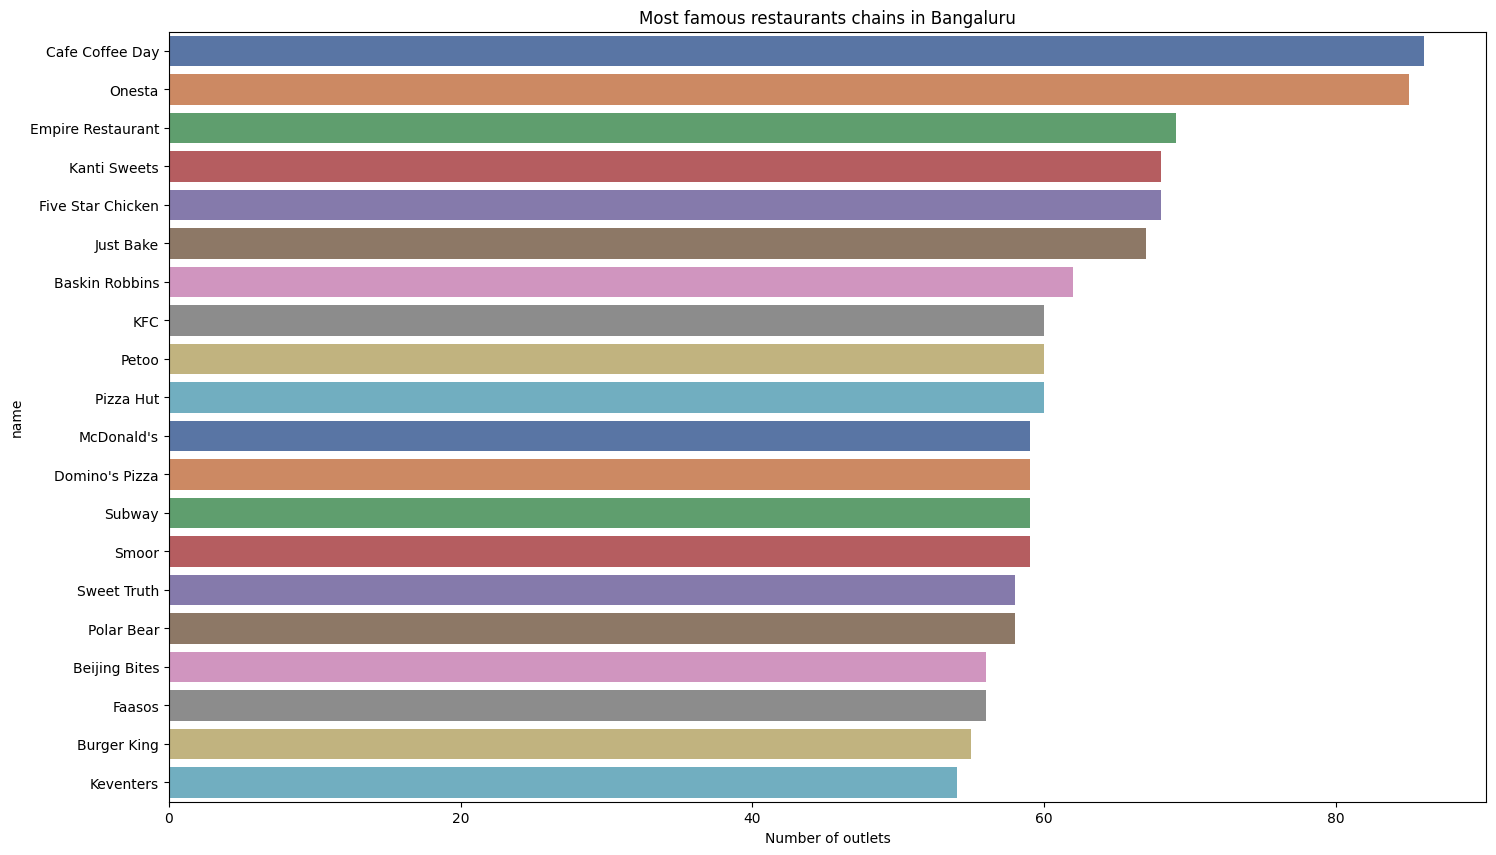

In [197]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

Cafe Coffee Day and Onesta seems to be most famous 

### Whether restaurant offer Table booking or not

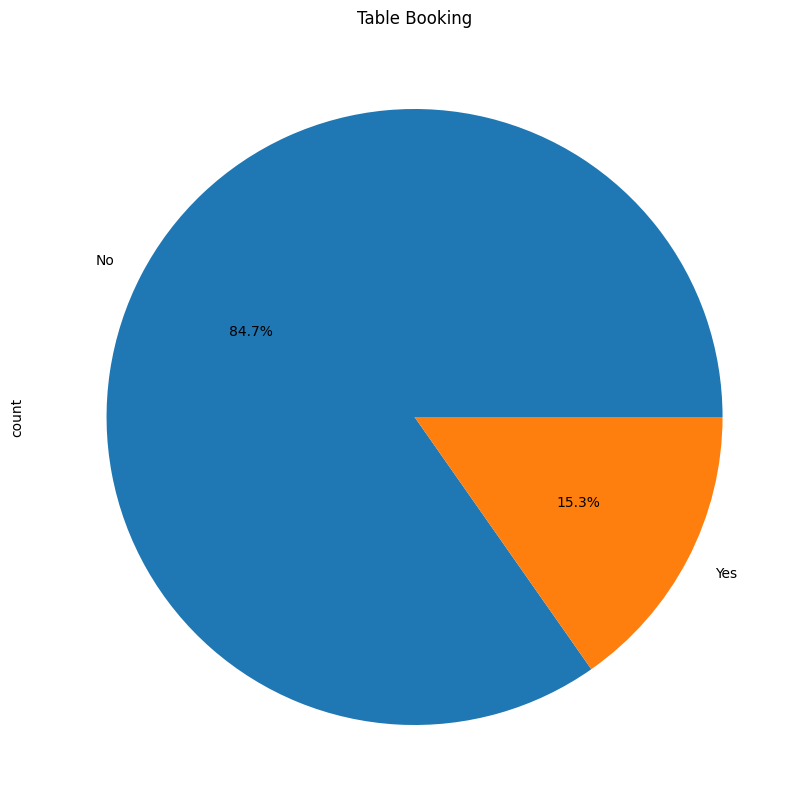

In [198]:
book=df['book_table'].value_counts()
plt.figure(figsize= (10,10))
book.plot.pie(autopct="%.1f%%")
plt.title('Table Booking')
plt.show()

### Whether Restaurants deliver online or Not

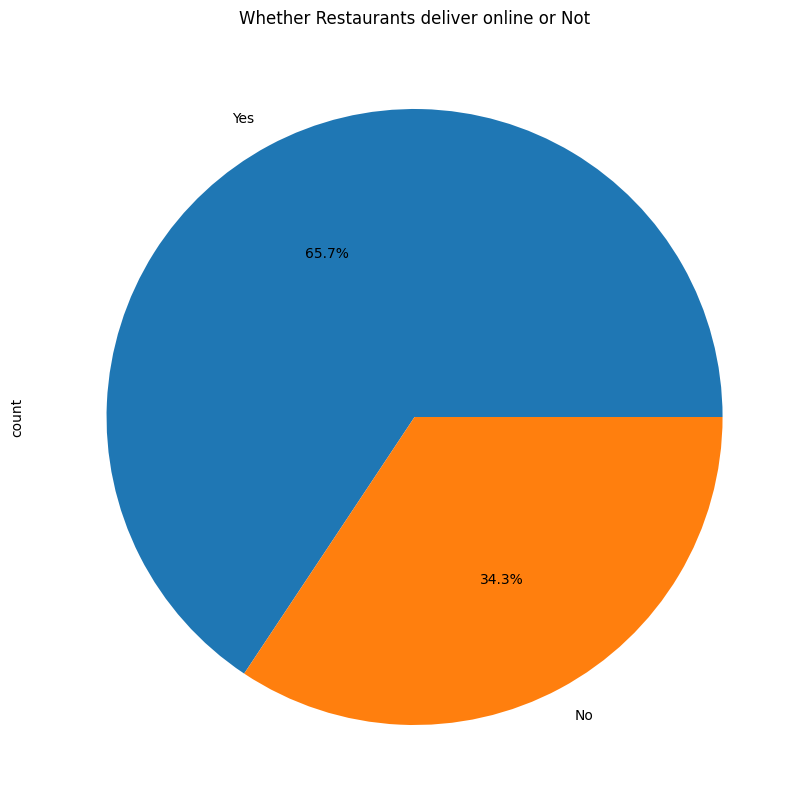

In [199]:
online=df['online_order'].value_counts()
plt.figure(figsize= (10,10))
online.plot.pie(autopct="%.1f%%")
plt.title('Whether Restaurants deliver online or Not')
plt.show()

### Rating Distribution

<Axes: xlabel='rate', ylabel='Density'>

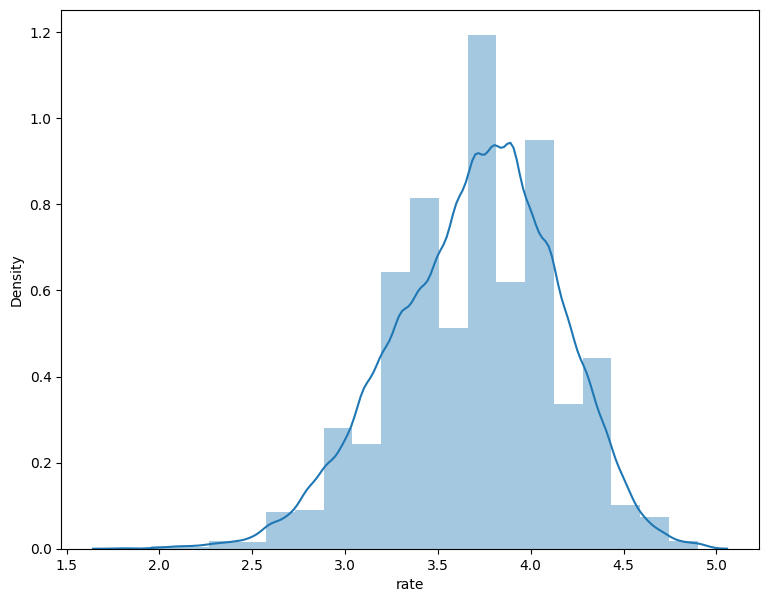

In [200]:
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)

We can infer from above that most of the ratings are within 3.5 and 4.5

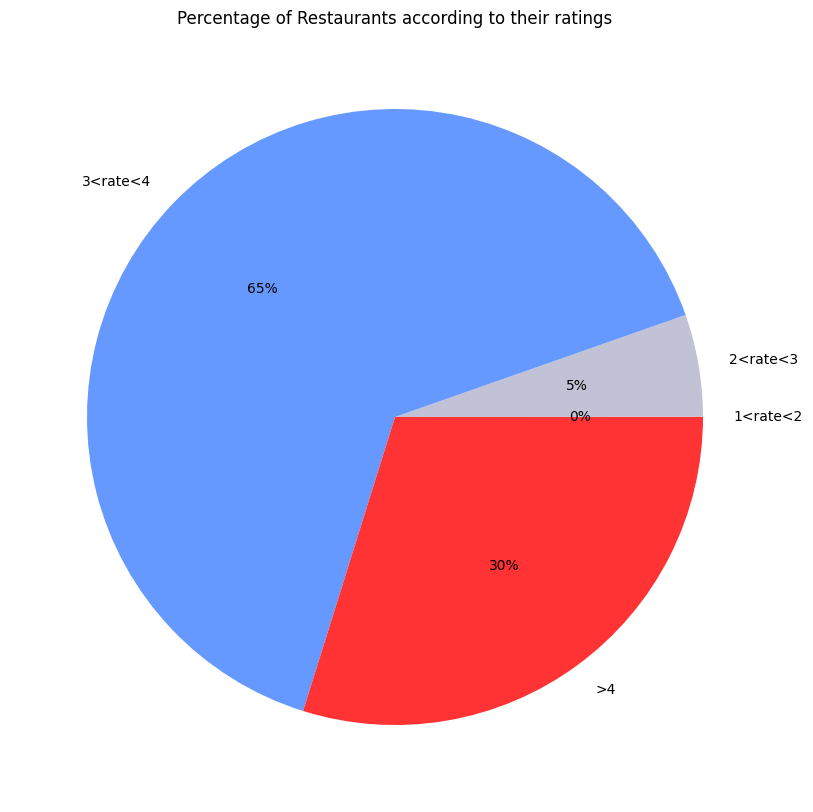

In [201]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]
plt.figure(figsize= (10,10))
labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%')

plt.title("Percentage of Restaurants according to their ratings")

plt.show()

We can infer from above that most of the ratings are within 3.5 and 4.5

### Services Types

Text(0.5, 1.0, 'Type of Service')

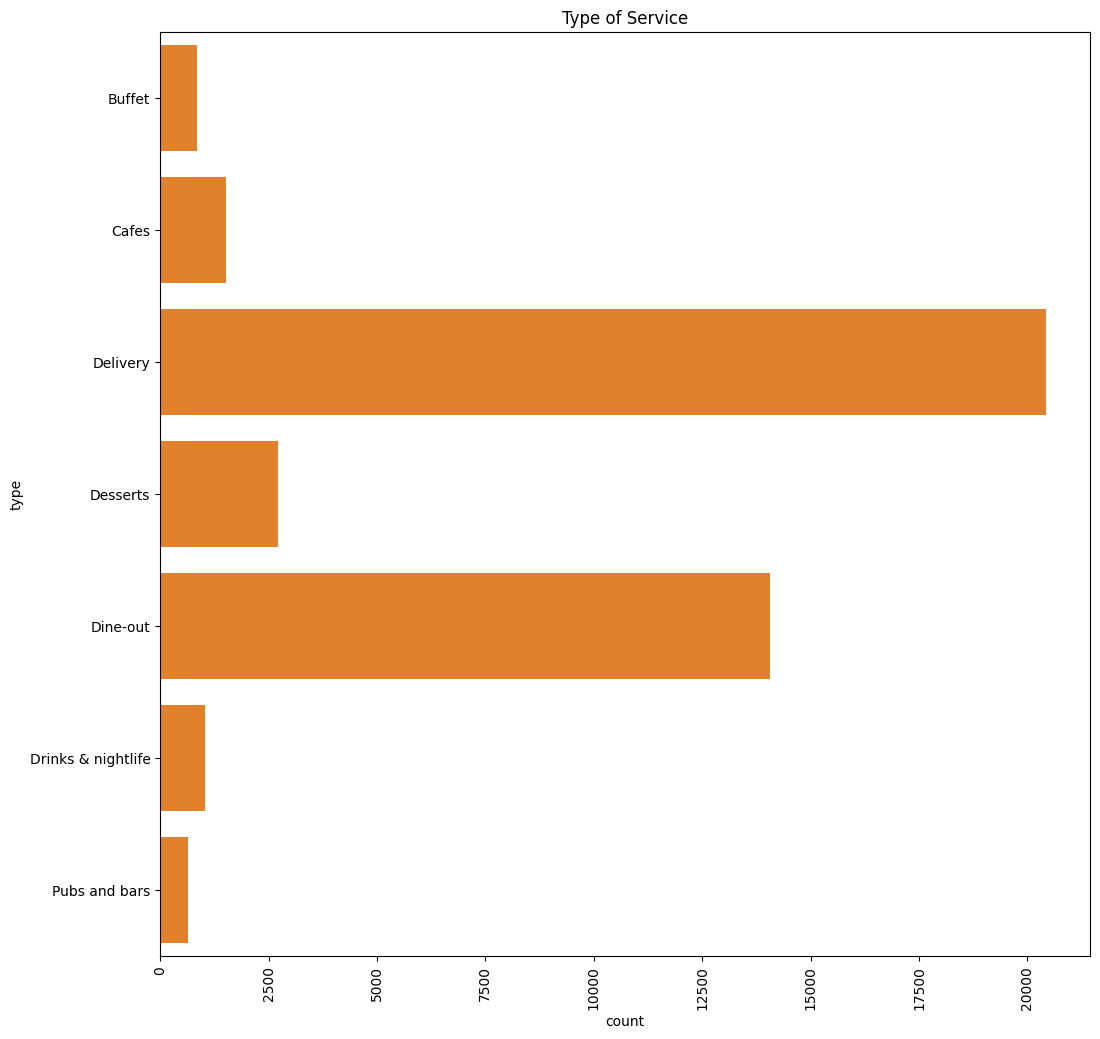

In [202]:

sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

The two main service types are Delivery and Dine-out

### Distribution of Cost of Food for two People

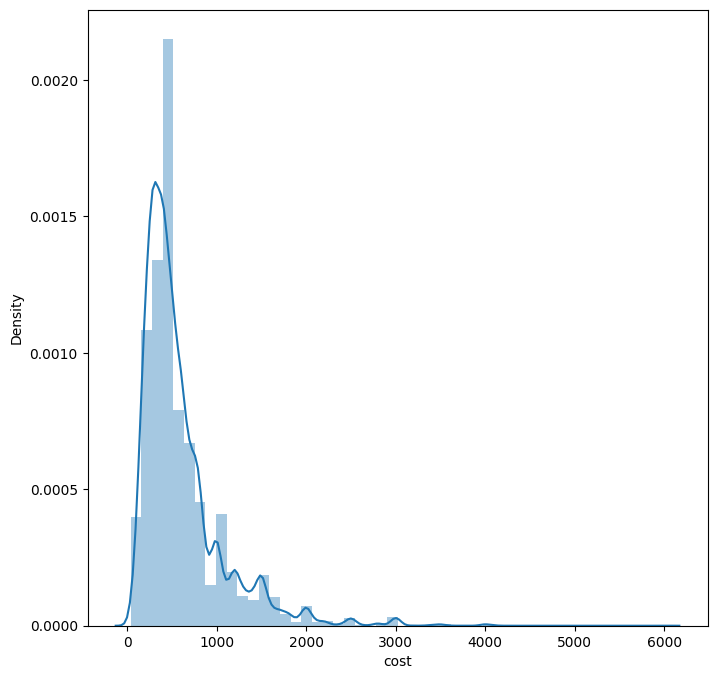

In [203]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

### Most Liked Dishes

In [204]:
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [205]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


not_available       17978
 Pasta               2692
 Pizza               1915
 Cocktails           1880
 Burgers             1736
 Mocktails           1623
 Biryani             1307
 Sandwiches          1287
Burgers              1256
 Coffee              1184
 Nachos              1170
 Fish                1116
 Paratha             1107
 Salads              1055
 Chicken Biryani     1004
Cocktails             891
 Fries                876
 Noodles              854
 Beer                 835
 Mutton Biryani       832
 Tea                  819
Coffee                801
 Sandwich             788
 Butter Chicken       782
 Thali                770
Biryani               749
Pizza                 747
 Roti                 729
 Brownie              726
 Salad                677
Name: count, dtype: int64

In [206]:
favourite_food[1:21]

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Name: count, dtype: int64

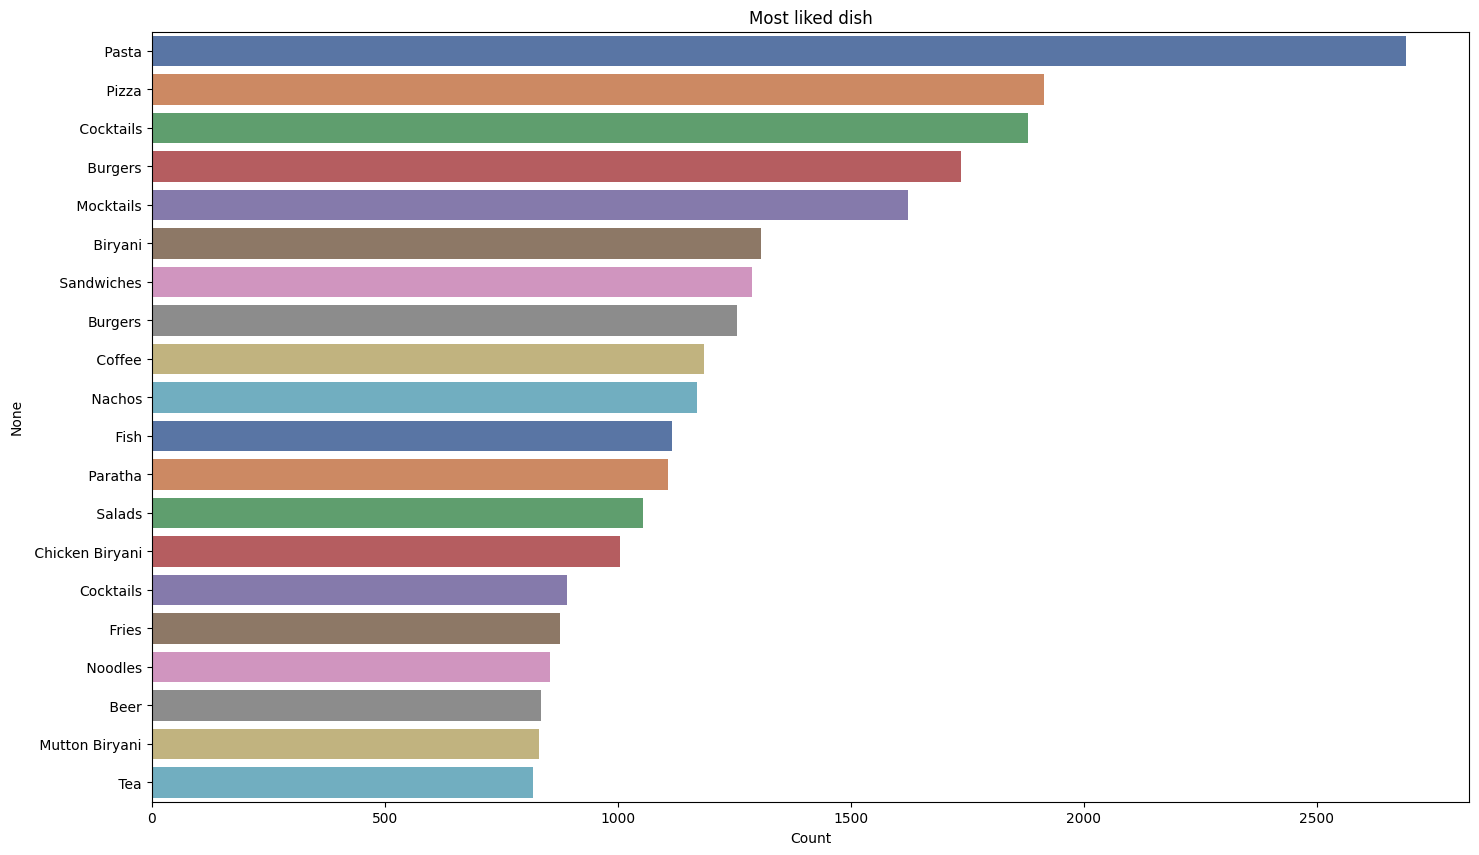

In [207]:
plt.figure(figsize=(17,10))
food=favourite_food[1:21]
sns.barplot(x=food,y=food.index,palette='deep')
plt.title("Most liked dish")
plt.xlabel("Count")
plt.show()

In [208]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Feature Engineering


#### Convert the online categorical variables into a numeric format

In [209]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [210]:
df.online_order = pd.to_numeric(df.online_order)

In [211]:
df.dtypes

name             object
online_order      int64
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

## change the booking categorical into to a categorical int

In [212]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [213]:
df.book_table = pd.to_numeric(df.book_table)

df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [214]:
top_20_location = df['location'].value_counts()[:20]

In [215]:
top_20_location.index

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 7th Block', 'Brigade Road', 'Koramangala 6th Block',
       'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor',
       'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari'],
      dtype='object', name='location')

In [216]:
top_20_location.sum()

27424

In [217]:
df['location'] = df['location'].apply(lambda x: x if x in top_20_location.index else 'other_location')

In [218]:
df['location'].value_counts()

location
other_location           13802
BTM                       3873
Koramangala 5th Block     2296
HSR                       1993
Indiranagar               1800
JP Nagar                  1710
Jayanagar                 1634
Whitefield                1568
Marathahalli              1410
Bannerghatta Road         1224
Koramangala 7th Block     1055
Koramangala 6th Block     1052
Brigade Road              1052
Bellandur                  996
Sarjapur Road              854
Koramangala 1st Block      851
Ulsoor                     846
Koramangala 4th Block      841
Electronic City            832
MG Road                    793
Banashankari               744
Name: count, dtype: int64

In [219]:
top_10_rest_type = df['rest_type'].value_counts()[:10]

In [220]:
top_10_rest_type

rest_type
Quick Bites           13866
Casual Dining          9605
Cafe                   3368
Dessert Parlor         1850
Delivery               1666
Takeaway, Delivery     1278
Casual Dining, Bar     1092
Bakery                  704
Bar                     640
Beverage Shop           638
Name: count, dtype: int64

In [221]:
top_10_rest_type.sum()

34707

In [222]:
df['rest_type'] = df['rest_type'].apply(lambda x: x if x in top_10_rest_type.index else 'other_rest_type')

In [223]:
df['rest_type'].value_counts()

rest_type
Quick Bites           13866
Casual Dining          9605
other_rest_type        6519
Cafe                   3368
Dessert Parlor         1850
Delivery               1666
Takeaway, Delivery     1278
Casual Dining, Bar     1092
Bakery                  704
Bar                     640
Beverage Shop           638
Name: count, dtype: int64

In [224]:
top_15_cuisines= df['cuisines'].value_counts()[:15]

In [225]:
top_15_cuisines

cuisines
North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
Bakery, Desserts                        613
Biryani                                 600
South Indian, North Indian, Chinese     561
Desserts                                545
Fast Food                               512
Chinese                                 409
Ice Cream, Desserts                     384
Bakery                                  377
Chinese, North Indian                   335
Mithai, Street Food                     317
North Indian, Chinese, Biryani          260
Name: count, dtype: int64

In [226]:
top_15_cuisines.sum()


10820

In [227]:
df['cuisines'] = df['cuisines'].apply(lambda x: x if x in top_15_cuisines.index else 'other_cuisines')

In [228]:
df.shape

(41226, 14)

In [229]:
top_15_menu_item= df['menu_item'].value_counts()

In [230]:
top_15_menu_item

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [231]:
df['menu_item'].value_counts()

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [232]:
df['menu_item'] = df['menu_item'].apply(lambda x: x.replace('[]','others'))

In [233]:
df['menu_item'].value_counts()

menu_item
others                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [234]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",others,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",others,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",others,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",others,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",others,Buffet,Banashankari


In [235]:
top_15_type = df['type'].value_counts()

In [236]:
top_15_type

type
Delivery              20427
Dine-out              14055
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  847
Pubs and bars           632
Name: count, dtype: int64

In [237]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",others,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",others,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",others,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",others,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",others,Buffet,Banashankari


In [238]:
df['city'].value_counts()

city
BTM                      2580
Koramangala 7th Block    2360
Koramangala 4th Block    2254
Koramangala 5th Block    2249
Koramangala 6th Block    2120
Jayanagar                1915
JP Nagar                 1632
Indiranagar              1537
Church Street            1512
MG Road                  1510
Brigade Road             1483
Lavelle Road             1449
Residency Road           1345
HSR                      1330
Marathahalli             1293
Bannerghatta Road        1207
Whitefield               1201
Old Airport Road         1173
Brookefield              1139
Basavanagudi             1072
Sarjapur Road            1017
Kammanahalli             1017
Kalyan Nagar              990
Bellandur                 956
Frazer Town               953
Malleshwaram              946
Rajajinagar               872
Electronic City           818
Banashankari              727
New BEL Road              569
Name: count, dtype: int64

In [239]:
top_20_location.index

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 7th Block', 'Brigade Road', 'Koramangala 6th Block',
       'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor',
       'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari'],
      dtype='object', name='location')

In [240]:
df.drop(['city'],axis=1,inplace = True)

In [241]:
top_20_name = df['name'].value_counts()[:20]

In [242]:
top_20_name.sum()

1258

In [243]:
df['name'].value_counts().sum()

41226

In [244]:
df.drop(['name'],axis=1,inplace = True)

In [245]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",others,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",others,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",others,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",others,Buffet
4,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",others,Buffet


In [246]:
df_review = data.copy()

In [247]:
df_review['reviews_list'] = df_review['reviews_list'].apply(lambda x : x[0])

In [248]:
df_review.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[,[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[,[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[,[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[,[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[,[],Buffet,Banashankari


In [249]:
df['reviews_list'] = df['reviews_list'].apply(lambda x : x.split(',')[0])

In [250]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,[('Rated 4.0',others,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,[('Rated 4.0',others,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,[('Rated 3.0',others,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,[('Rated 4.0',others,Buffet
4,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,[('Rated 4.0',others,Buffet


In [251]:
df['reviews_list'] = df['reviews_list'].apply(lambda x : x.split('Rated'))

In [252]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,"[[(', 4.0']",others,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,"[[(', 4.0']",others,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,"[[(', 3.0']",others,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,"[[(', 4.0']",others,Buffet
4,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,"[[(', 4.0']",others,Buffet


In [253]:
df['reviews_list'] = df['reviews_list'].apply(lambda x : x[-1])

In [254]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,4.0',others,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,4.0',others,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,3.0',others,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,4.0',others,Buffet
4,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,4.0',others,Buffet


In [255]:
df['reviews_list'] = df['reviews_list'].apply(lambda x : x.replace('\'',''))

In [256]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,4.0,others,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,4.0,others,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,3.0,others,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,4.0,others,Buffet
4,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,4.0,others,Buffet


In [257]:
df['reviews_list'] = df['reviews_list'].apply(lambda x : x.strip())

In [258]:
df['reviews_list'].isnull().sum()

0

In [259]:
digits_in_review= pd.DataFrame(df['reviews_list'].str.replace('.','').str.isdigit()) 

In [260]:
df = df[digits_in_review['reviews_list'] == True]

In [261]:
df.shape

(40116, 12)

In [262]:
df['reviews_list'] = df['reviews_list'].astype(float)

In [263]:
data['reviews_list'].unique()

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [264]:
df.dtypes

online_order      int64
book_table        int64
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list    float64
menu_item        object
type             object
dtype: object

## Apply Onehot Encoding on the categorical variables

In [265]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",other_cuisines,800.0,4.0,others,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",other_cuisines,800.0,4.0,others,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",other_cuisines,800.0,3.0,others,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,other_cuisines,300.0,4.0,others,Buffet
4,0,0,3.8,166,other_location,Casual Dining,"Panipuri, Gol Gappe",other_cuisines,600.0,4.0,others,Buffet


In [266]:
df.drop(['menu_item','dish_liked'],axis = 1 , inplace = True)

In [267]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type
0,1,1,4.1,775,Banashankari,Casual Dining,other_cuisines,800.0,4.0,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,other_cuisines,800.0,4.0,Buffet
2,1,0,3.8,918,Banashankari,other_rest_type,other_cuisines,800.0,3.0,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,other_cuisines,300.0,4.0,Buffet
4,0,0,3.8,166,other_location,Casual Dining,other_cuisines,600.0,4.0,Buffet


In [268]:
#Handling Categorical Values 
source_dummy=pd.get_dummies(df[['location','rest_type','cuisines','type']],drop_first=True)
df=pd.concat([source_dummy,df],axis=1)

In [269]:
df.head()

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type
0,True,False,False,False,False,False,False,False,False,False,...,1,1,4.1,775,Banashankari,Casual Dining,other_cuisines,800.0,4.0,Buffet
1,True,False,False,False,False,False,False,False,False,False,...,1,0,4.1,787,Banashankari,Casual Dining,other_cuisines,800.0,4.0,Buffet
2,True,False,False,False,False,False,False,False,False,False,...,1,0,3.8,918,Banashankari,other_rest_type,other_cuisines,800.0,3.0,Buffet
3,True,False,False,False,False,False,False,False,False,False,...,0,0,3.7,88,Banashankari,Quick Bites,other_cuisines,300.0,4.0,Buffet
4,False,False,False,False,False,False,False,False,False,False,...,0,0,3.8,166,other_location,Casual Dining,other_cuisines,600.0,4.0,Buffet


In [270]:
df.shape

(40116, 61)

In [271]:
df.drop(['location','rest_type','cuisines','type'],inplace=True,axis=1)

In [272]:
df.shape

(40116, 57)

In [273]:
df.head()

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order,book_table,rate,votes,cost,reviews_list
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,1,4.1,775,800.0,4.0
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,0,4.1,787,800.0,4.0
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,0,3.8,918,800.0,3.0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,3.7,88,300.0,4.0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,3.8,166,600.0,4.0


In [274]:
df.dtypes

location_Banashankari                              bool
location_Bannerghatta Road                         bool
location_Bellandur                                 bool
location_Brigade Road                              bool
location_Electronic City                           bool
location_HSR                                       bool
location_Indiranagar                               bool
location_JP Nagar                                  bool
location_Jayanagar                                 bool
location_Koramangala 1st Block                     bool
location_Koramangala 4th Block                     bool
location_Koramangala 5th Block                     bool
location_Koramangala 6th Block                     bool
location_Koramangala 7th Block                     bool
location_MG Road                                   bool
location_Marathahalli                              bool
location_Sarjapur Road                             bool
location_Ulsoor                                 

In [275]:
df[df['votes']==0]

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order,book_table,rate,votes,cost,reviews_list
392,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,1,0,3.7,0,300.0,5.0
6590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,1,4.0,0,1100.0,3.0
16769,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,0,0,3.6,0,700.0,5.0
16778,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,1,0,3.6,0,300.0,5.0
16793,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,1,0,3.7,0,400.0,4.0
16808,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,1,0,4.3,0,400.0,5.0
16880,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,1,1,3.9,0,800.0,3.0
16884,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,1,0,3.7,0,1000.0,5.0
16897,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,1,0,3.6,0,800.0,5.0
16921,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,1,0,3.7,0,300.0,1.0


In [276]:
df['votes'] = df['votes'].replace(0, 1)

In [277]:
df[df['votes']==0]

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order,book_table,rate,votes,cost,reviews_list


In [278]:
df[df['votes']==1]

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order,book_table,rate,votes,cost,reviews_list
392,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,1,0,3.7,1,300.0,5.0
6590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,1,4.0,1,1100.0,3.0
16769,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,0,0,3.6,1,700.0,5.0
16778,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,1,0,3.6,1,300.0,5.0
16793,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,1,0,3.7,1,400.0,4.0
16808,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,1,0,4.3,1,400.0,5.0
16880,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,1,1,3.9,1,800.0,3.0
16884,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,1,0,3.7,1,1000.0,5.0
16897,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,1,0,3.6,1,800.0,5.0
16921,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,1,0,3.7,1,300.0,1.0


In [279]:

df['cost'] = np.log(df['cost'])
df['votes'] = np.log(df['votes'])

In [280]:
df.head()

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order,book_table,rate,votes,cost,reviews_list
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,1,4.1,6.652863,6.684612,4.0
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,0,4.1,6.668228,6.684612,4.0
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,0,3.8,6.822197,6.684612,3.0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,3.7,4.477337,5.703782,4.0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,3.8,5.111988,6.396930,4.0


In [281]:
df[['cost','votes']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost,40116.0,6.185937,0.655518,3.688879,5.703782,6.214608,6.620073,8.699515
votes,40116.0,4.448378,1.706386,0.000000,3.135494,4.343805,5.662960,9.731037


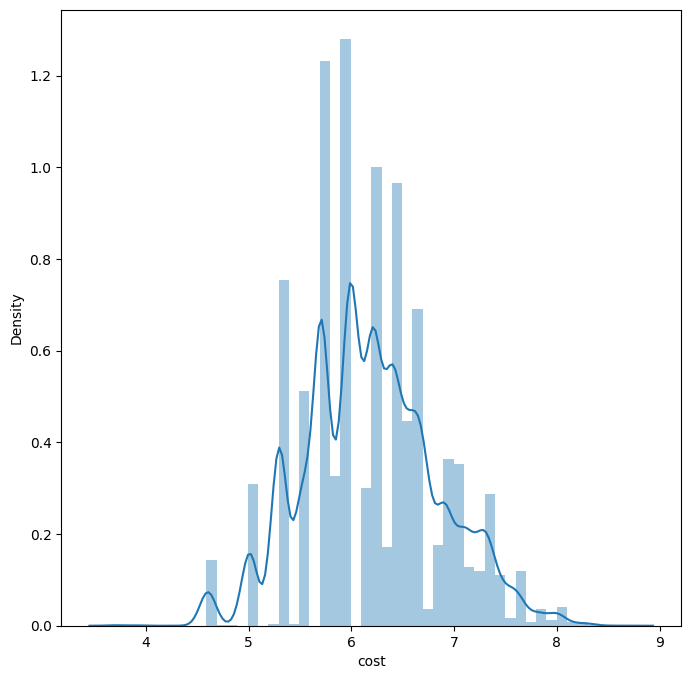

In [282]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

In [283]:
df[df['rate']<3].head()

,location_Banashankari,location_Bannerghatta Road,location_Bellandur,location_Brigade Road,location_Electronic City,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Koramangala 1st Block,...,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order,book_table,rate,votes,cost,reviews_list
31,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,0,2.8,6.226537,6.214608,1.0
36,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,1,0,2.8,4.510860,5.991465,1.0
72,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,2.9,4.430817,6.551080,1.0
88,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,2.6,5.645447,6.396930,3.0
110,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0,0,2.9,3.218876,5.298317,1.0


# Building Our Model

In [284]:
X = df.drop(['rate'],axis =1)
y = df['rate']

In [285]:
def train_and_evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Decision Tree': DecisionTreeRegressor(random_state=0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0, min_samples_leaf=0.0001),
        'Extra Trees': ExtraTreesRegressor(n_estimators=100),
        'XGBoost': XGBRegressor()
    }

    # Dictionary to store model scores
    model_scores = {}

    # Train and evaluate models
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        model_scores[model_name] = r2
        print(f"{model_name} R-squared score: {r2}")

    # Choose the best model based on the highest R-squared score
    best_model_name = max(model_scores, key=model_scores.get)
    best_model = models[best_model_name]
    print(f"\nBest Model: {best_model_name} with R-squared score of {model_scores[best_model_name]}")

    # Save the best model to a pickle file
    pickle.dump(best_model, open(f"model.pkl", 'wb'))

    return best_model_name, best_model

# Example usage with your DataFrame 'df'
best_model_name, best_model = train_and_evaluate_models(X, y)

Linear Regression R-squared score: 0.5340021493168337
SVR R-squared score: 0.5595469188258343
Decision Tree R-squared score: 0.8544763840439946
Random Forest R-squared score: 0.8501170077606833
Extra Trees R-squared score: 0.9217056244815268
XGBoost R-squared score: 0.7450425686252286

Best Model: Extra Trees with R-squared score of 0.9217056244815268


## Artificial Neural Network

In [286]:
ann = tf.keras.models.Sequential()

In [287]:
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))

In [288]:
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))

In [289]:
ann.add(tf.keras.layers.Dense(units=1))

In [290]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [291]:

import numpy as np

X_train = np.array(X_train).astype(float)
y_train = np.array(y_train).astype(float)
X_test = np.array(X_test).astype(float)


In [292]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


878/878 [==============================] - 1s 832us/step - loss: 0.2440
Epoch 2/100
878/878 [==============================] - 1s 802us/step - loss: 0.1010
Epoch 3/100
878/878 [==============================] - 1s 802us/step - loss: 0.0946
Epoch 4/100
878/878 [==============================] - 1s 802us/step - loss: 0.0919
Epoch 5/100
878/878 [==============================] - 1s 820us/step - loss: 0.0883
Epoch 6/100
878/878 [==============================] - 1s 813us/step - loss: 0.0860
Epoch 7/100
878/878 [==============================] - 1s 781us/step - loss: 0.0841
Epoch 8/100
878/878 [==============================] - 1s 789us/step - loss: 0.0823
Epoch 9/100
878/878 [==============================] - 1s 804us/step - loss: 0.0803
Epoch 10/100
878/878 [==============================] - 1s 831us/step - loss: 0.0791
Epoch 11/100
878/878 [==============================] - 1s 789us/step - loss: 0.0774
Epoch 12/100
878/878 [==============================] - 1s 804us/step - loss: 0.0767
E

In [293]:
y_pred = ann.predict(X_test)
r2_score(y_test,y_pred)

377/377 [==============================] - 0s 552us/step


0.705718786143959